In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
HT_df = pd.read_csv('gs://websitehumantrafficking/final_df.csv')

/Users/lega/.pyenv/versions/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,4,26,87,89,90,91,92,95,96,100,101,104,108,114,116) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [156]:
HT_df['gender'].unique()

array(['female', 'male', 'unknown', 'Female', 'Male', nan,
       'Transgender/NonConforming'], dtype=object)

In [157]:
HT_df['gender'].replace({'Male': 'male', 'Female': 'female'}, inplace=True)

In [158]:
HT_df['gender'].unique()

array(['female', 'male', 'unknown', nan, 'Transgender/NonConforming'],
      dtype=object)

In [160]:
HT_df['ageBroad'].unique()

array(['Unknown', '9-17', '0-8', '24-26', '18-20', '21-23', '39-47',
       '27-29', '30-38', nan, '48+'], dtype=object)

In [61]:
HT_df['arrival_1']

0        American Samoa
1               Lebanon
2                 India
3         United States
4                 Sudan
              ...      
99103             Libya
99104             Libya
99105             Libya
99106             Libya
99107             Libya
Name: arrival_1, Length: 99108, dtype: object

In [20]:
scraped_data_only = HT_df[0:1358]

In [42]:
moc_scraped = scraped_data_only.iloc[:,9:26]

In [48]:
moc_scraped.sum()

meansOfControlDebtBondage                 127.0
meansOfControlExcessiveWorkingHours       132.0
meansOfControlRestrictsMedicalCare         27.0
meansOfControlUsesChildren                  0.0
control_method_witchcraft                  39.0
meansOfControlPhysicalAbuse               831.0
meansOfControlPsychologicalAbuse          644.0
meansOfControlRestrictsFinancialAccess    213.0
meansOfControlRestrictsMovement           391.0
meansOfControlSexualAbuse                 277.0
meansOfControlTakesEarnings                22.0
meansOfControlThreatOfLawEnforcement       90.0
meansOfControlThreats                     207.0
meansOfControlPsychoactiveSubstances        9.0
meansOfControlWithholdsDocuments          251.0
meansOfControlWithholdsNecessities        171.0
meansOfControlFalsePromises               332.0
dtype: float64

In [51]:
moc_scraped_data = pd.DataFrame(moc_scraped.sum(), columns=['sum'])

In [52]:
moc_scraped_data

,sum
meansOfControlDebtBondage,127.0
meansOfControlExcessiveWorkingHours,132.0
meansOfControlRestrictsMedicalCare,27.0
meansOfControlUsesChildren,0.0
control_method_witchcraft,39.0
meansOfControlPhysicalAbuse,831.0
meansOfControlPsychologicalAbuse,644.0
meansOfControlRestrictsFinancialAccess,213.0
meansOfControlRestrictsMovement,391.0
meansOfControlSexualAbuse,277.0


In [55]:
moc_scraped_data.sort_values(by='sum', ascending=False)

,sum
meansOfControlPhysicalAbuse,831.0
meansOfControlPsychologicalAbuse,644.0
meansOfControlRestrictsMovement,391.0
meansOfControlFalsePromises,332.0
meansOfControlSexualAbuse,277.0
meansOfControlWithholdsDocuments,251.0
meansOfControlRestrictsFinancialAccess,213.0
meansOfControlThreats,207.0
meansOfControlWithholdsNecessities,171.0
meansOfControlExcessiveWorkingHours,132.0


In [4]:
MoC_data_bar = HT_df[(HT_df.meansOfControlConcatenated.notna())].\
meansOfControlConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)

In [7]:
MoC_data_bar.sort_values(ascending=False)

Not specified                 25475.0
Threats                       11882.0
Psychological abuse           11865.0
Restricts movement            10590.0
Takes earnings                 8004.0
Other                          6802.0
Physical abuse                 6613.0
Psychoactive substances        6041.0
Excessive working hours        5387.0
False promises                 5333.0
Withholds documents            4535.0
Withholds necessities          4480.0
Threat of law enforcement      4421.0
Sexual abuse                   4163.0
Debt bondage                   3866.0
Physical Abuse                 1890.0
Restricts medical care         1871.0
Restricts financial access      463.0
Uses children                   337.0
Withholds necessitie             15.0
dtype: float64

In [15]:
means_of_control_top = MoC_data_bar.sort_values(ascending=False).head()

In [16]:
means_of_control_top

Not specified          25475.0
Threats                11882.0
Psychological abuse    11865.0
Restricts movement     10590.0
Takes earnings          8004.0
dtype: float64

/Users/lega/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


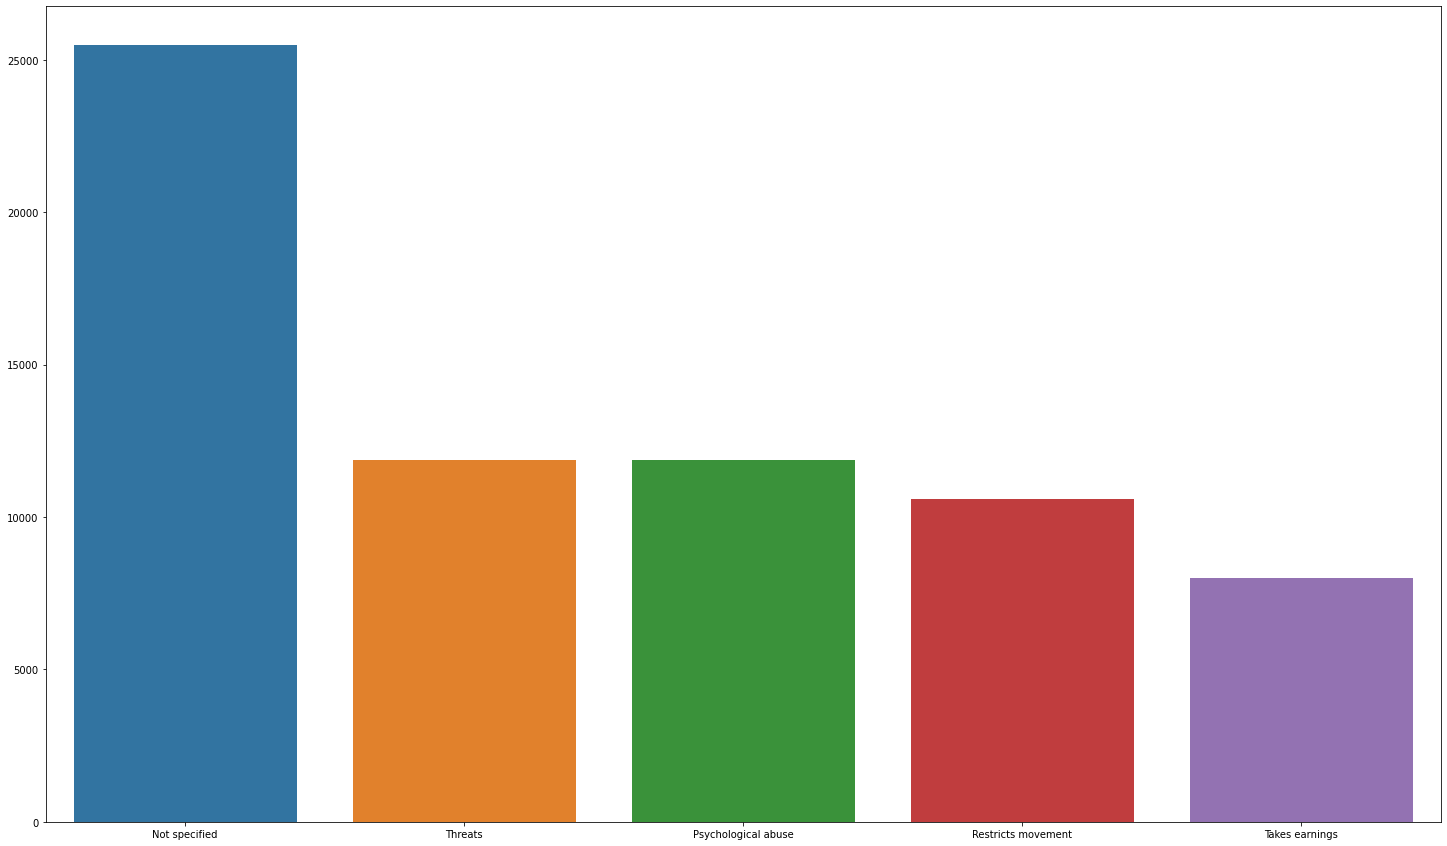

In [17]:
fig = plt.figure(figsize=(25,15))
ax = sns.barplot(means_of_control_top.index, means_of_control_top.values)

In [122]:
def bar_from_moc_country(htdf, country_name):
    country = htdf[htdf['departure']==country_name].reset_index()
    MoC_data_bar = country[(country.meansOfControlConcatenated.notna())].\
    meansOfControlConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
    
    means_of_control_top = MoC_data_bar.sort_values(ascending=False).head()
    
    fig = plt.figure(figsize=(20,7))
    ax = sns.barplot(means_of_control_top.index, means_of_control_top.values)
    return ax

/Users/lega/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

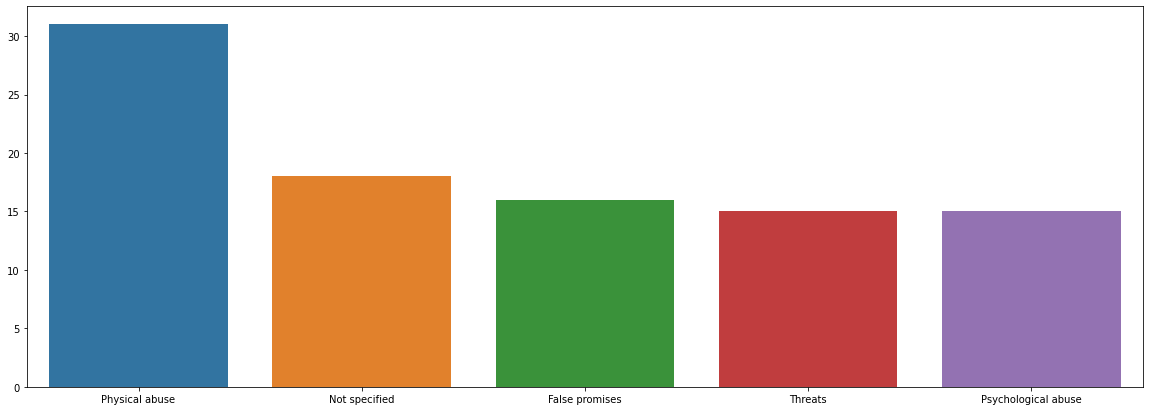

In [116]:
bar_from_moc_country(HT_df, 'India')

/Users/lega/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

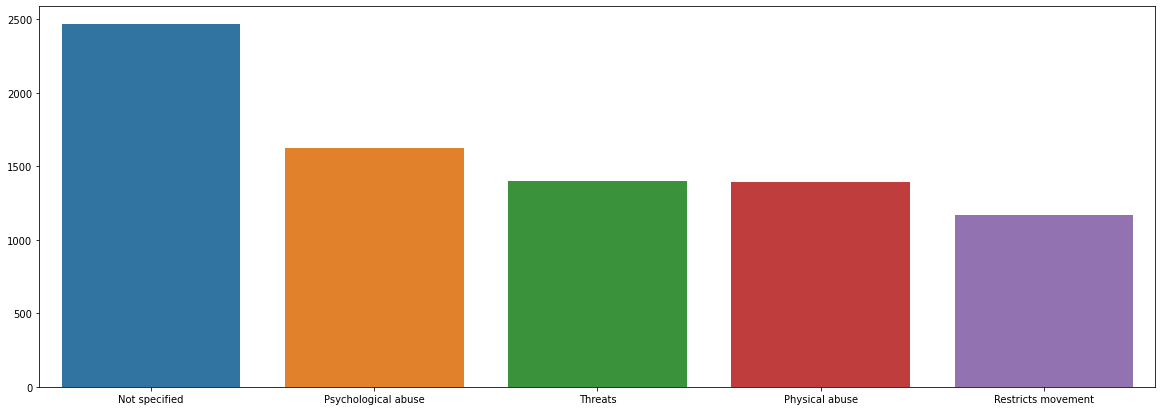

In [117]:
bar_from_moc_country(HT_df, 'United States')

In [148]:
def bar_from_moc_gender(htdf, gender_name):
    gen = htdf[htdf['gender']==gender_name].reset_index()
    MoC_data_bar = gen[(gen.meansOfControlConcatenated.notna())].\
    meansOfControlConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
    
    means_of_control_top = MoC_data_bar.sort_values(ascending=False).head()
    
    fig = plt.figure(figsize=(20,7))
    ax = sns.barplot(means_of_control_top.index, means_of_control_top.values)
    return ax

/Users/lega/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

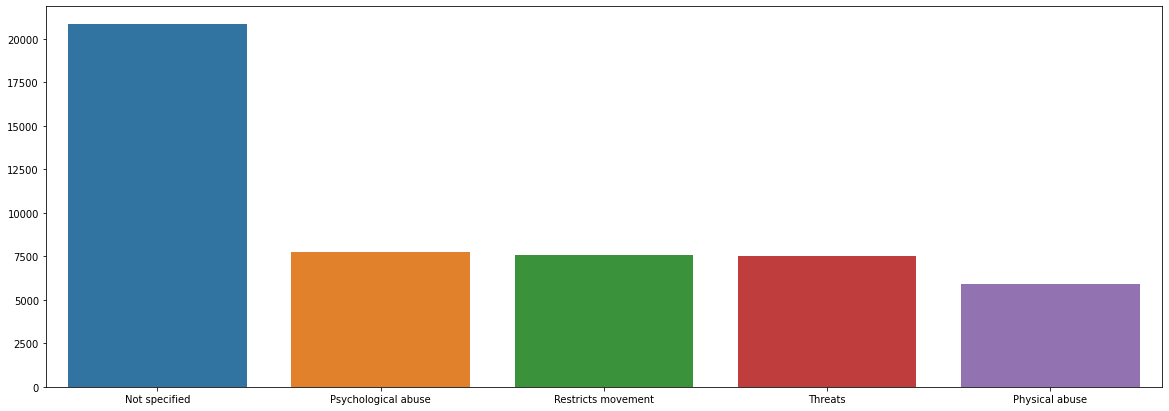

In [149]:
#MoC female victims: mostly undocumented Moc, psychological abuse, movement restriction, threats, physical abuse

bar_from_moc_gender(HT_df, 'female')


/Users/lega/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

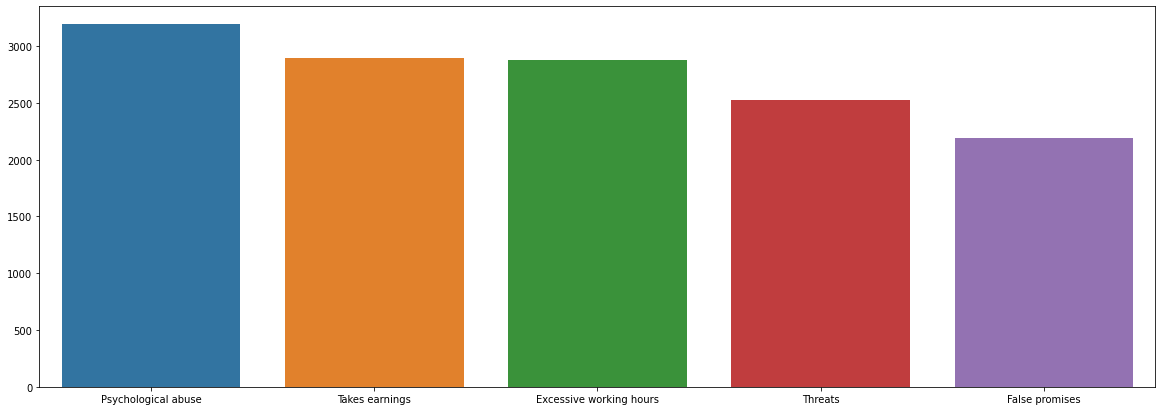

In [150]:
#MoC male victims: psychological abuse, wages taken, made to work excessive hours, threats, false promises

bar_from_moc_gender(HT_df, 'male')


/Users/lega/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

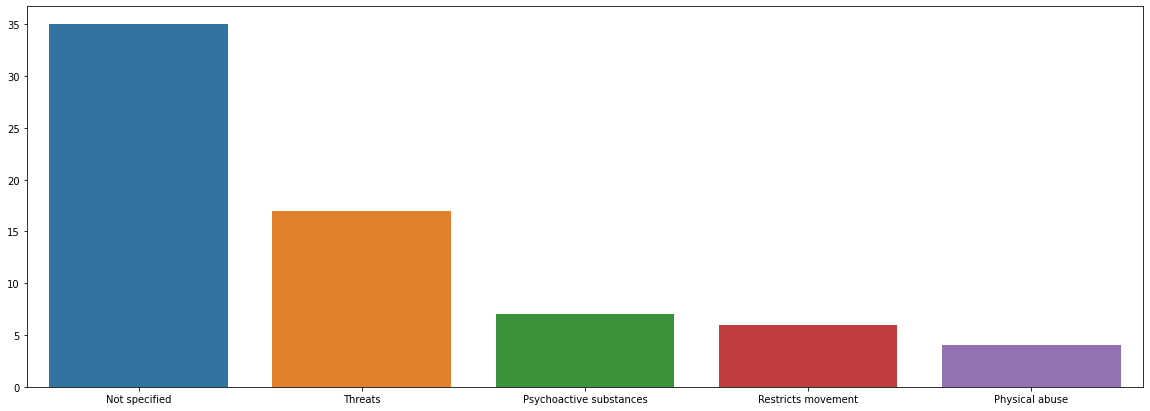

In [151]:
#MoC transgender/gender nonconforming victims: mostly undocumented Moc, threats, psychoactive substances, movement restriction, physical abuse
bar_from_moc_gender(HT_df, 'Transgender/NonConforming')


In [152]:
def bar_from_moc_age(htdf, age_group):
    age_broad = htdf[htdf['ageBroad']==age_group].reset_index()
    MoC_data_bar = age_broad[(age_broad.meansOfControlConcatenated.notna())].\
    meansOfControlConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
    
    means_of_control_top = MoC_data_bar.sort_values(ascending=False).head()
    
    fig = plt.figure(figsize=(20,7))
    ax = sns.barplot(means_of_control_top.index, means_of_control_top.values)
    return ax

/Users/lega/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

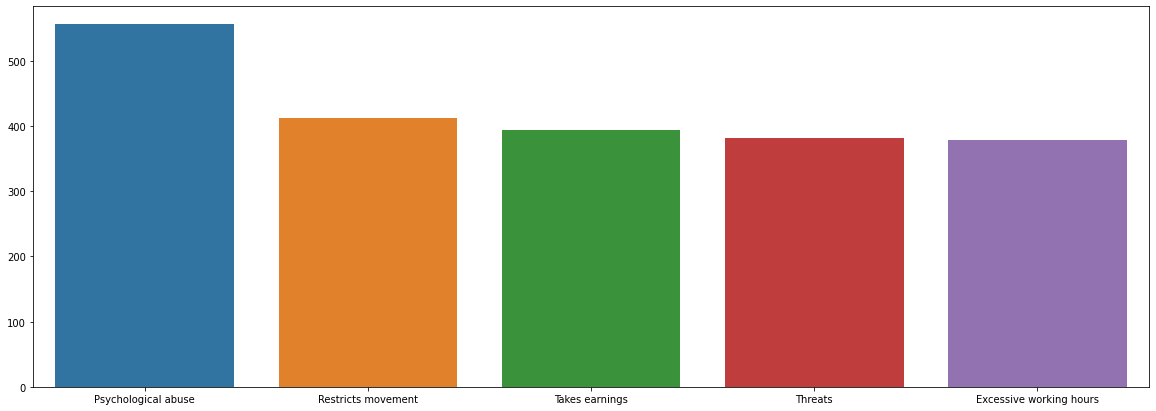

In [163]:
bar_from_moc_age(HT_df, '39-47')

In [ ]:
gen = htdf[htdf['gender']==gender_name].reset_index()
age = gen[gen['ageBroad']==age_group].reset_index()

In [164]:
def bar_from_moc_gender_age(htdf, gender_name, age_group):
    gen = htdf[htdf['gender']==gender_name].reset_index()
    age_broad = gen[gen['ageBroad']==age_group].reset_index()
    MoC_data_bar = age_broad[(age_broad.meansOfControlConcatenated.notna())].\
    meansOfControlConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
    
    means_of_control_top = MoC_data_bar.sort_values(ascending=False).head()
    
    fig = plt.figure(figsize=(20,7))
    ax = sns.barplot(means_of_control_top.index, means_of_control_top.values)
    return ax

/Users/lega/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

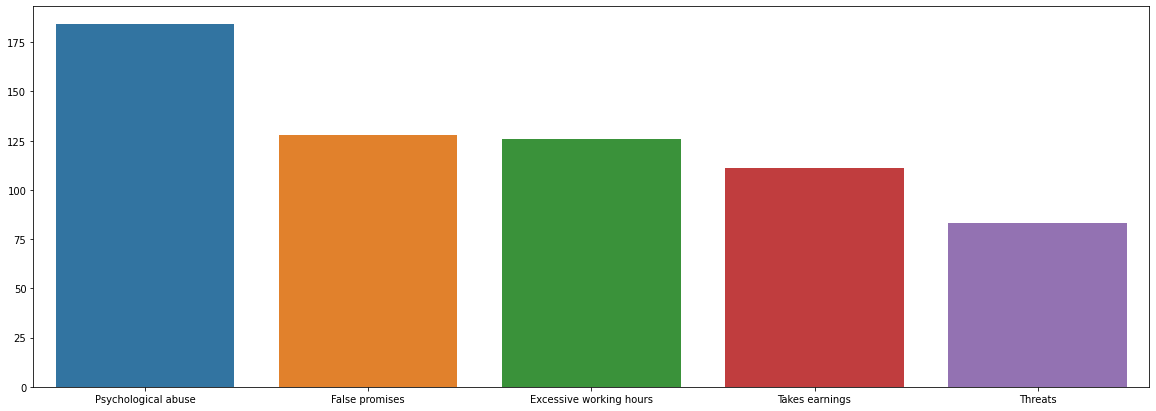

In [166]:
bar_from_moc_gender_age(HT_df, 'male', '48+')

In [181]:
import numpy as np
def bar_from_moc_gender_age(htdf, country_name=-1, gender_name=-1, age_group=-1):
    if country_name != -1:
        country = htdf[htdf['arrival_1']==country_name].reset_index(drop=True)
    else:
        country = htdf
    if gender_name != -1:
        gen = country[country['gender']==gender_name].reset_index(drop=True)
    else:
        gen = country
    if age_group != -1:
        age_broad = gen[gen['ageBroad']==age_group].reset_index(drop=True)
    else:
        age_broad = gen
        
#     country = htdf[htdf['arrival_1']==country_name].reset_index()
#     gen = country[country['gender']==gender_name].reset_index()
#     age_broad = gen[gen['ageBroad']==age_group].reset_index()
    MoC_data_bar = age_broad[(age_broad.meansOfControlConcatenated.notna())].\
    meansOfControlConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
    
    means_of_control_top = MoC_data_bar.sort_values(ascending=False).head()
    
    fig = plt.figure(figsize=(20,7))
    ax = sns.barplot(means_of_control_top.index, means_of_control_top.values)
    return ax

/Users/lega/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

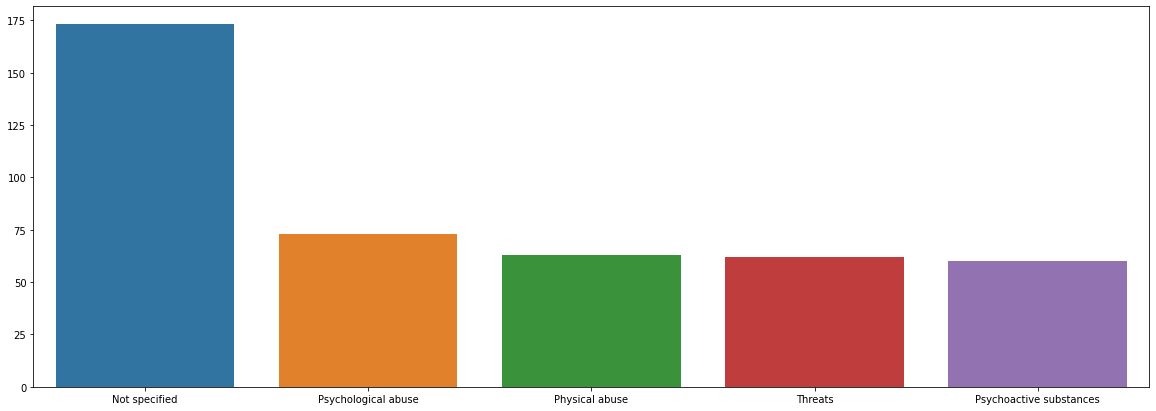

In [196]:
bar_from_moc_gender_age(HT_df, country_name = 'United States', gender_name = 'female', age_group='48+')
#use drop down list in web page to avoid getting null returns/ errors